In [14]:
import torch

x = torch.tensor(1.0)
y = torch.tensor(2.0)

w = torch.tensor(1.0, requires_grad= True)

#forward pass
y_hat = x * w
loss = (y_hat - y)**2

print(loss)

#backward pass

loss.backward()
w.grad


#update weights and then forward and backward pass

tensor(1., grad_fn=<PowBackward0>)


tensor(-2.)

In [28]:
# W is scalar
import numpy as np

X = np.array([1,2,3,4] , dtype = np.float32)
Y = np.array([2,4,6,8], dtype = np.float32)

w = 0.0

def forward(x):
    return w*x
    

def loss(y, y_predicted):
    return ((y-y_predicted)**2).mean()


#Loss = 1/N*(x*w - y)**2
#dl/dw = 1/N 2x * (x*w - y)
def gradient(x, y, y_predicted):
    return np.dot(2*x, y_predicted-y)


print(f'Prediction before training: f(5) = {forward(5):.3f}')

#Training 
learning_rate = 0.01
n_iters = 20


for epoch in range(n_iters):
    #prediction = forward pass
    y_pred = forward(X)
    #print(f'y_hat {y_pred}')
    
    l = loss(Y, y_pred)
    
    dw = gradient(X, Y, y_pred)
    
    w -=  learning_rate * dw
    
    if epoch % 2 == 0:
        print(f'epoch {epoch+1} : dw = {dw:.3f} W = {w:.3f}, loss={l:.8f}')
        
        
print(f'Prediction after training: f(5) = {forward(5):.3f}')

Prediction before training: f(5) = 0.000
epoch 1 : dw = -120.000 W = 1.200, loss=30.00000000
epoch 3 : dw = -19.200 W = 1.872, loss=0.76800019
epoch 5 : dw = -3.072 W = 1.980, loss=0.01966083
epoch 7 : dw = -0.492 W = 1.997, loss=0.00050332
epoch 9 : dw = -0.079 W = 1.999, loss=0.00001288
epoch 11 : dw = -0.013 W = 2.000, loss=0.00000033
epoch 13 : dw = -0.002 W = 2.000, loss=0.00000001
epoch 15 : dw = -0.000 W = 2.000, loss=0.00000000
epoch 17 : dw = -0.000 W = 2.000, loss=0.00000000
epoch 19 : dw = -0.000 W = 2.000, loss=0.00000000
Prediction after training: f(5) = 10.000


In [54]:
import torch

X = torch.tensor([1,2,3,4], dtype = torch.float32)
Y = torch.tensor([2,3,6,8], dtype = torch.float32)

W = torch.tensor(0.0, dtype = torch.float32, requires_grad = True)

def forward(x):
    return W*x
    

def loss(y, y_predicted):
    return ((y-y_predicted)**2).mean()

#Training 
learning_rate = 0.01
n_iters = 100


for epoch in range(n_iters):
    #prediction = forward pass
    y_pred = forward(X)
    
    
    l = loss(Y, y_pred)
    
    l.backward()
    
    with torch.no_grad():
        W -=  learning_rate * W.grad
        
    W.grad.zero_()
    
    if epoch % 10 == 0:
        print(f'epoch {epoch+1} : dw = {W.grad:.3f} W = {W:.3f}, loss={l:.8f}')
        
        
print(f'Prediction after training: f(5) = {forward(5):.3f}')




epoch 1 : dw = 0.000 W = 0.290, loss=28.25000000
epoch 11 : dw = 0.000 W = 1.610, loss=1.30322576
epoch 21 : dw = 0.000 W = 1.870, loss=0.25878128
epoch 31 : dw = 0.000 W = 1.921, loss=0.21829906
epoch 41 : dw = 0.000 W = 1.931, loss=0.21672995
epoch 51 : dw = 0.000 W = 1.933, loss=0.21666913
epoch 61 : dw = 0.000 W = 1.933, loss=0.21666676
epoch 71 : dw = 0.000 W = 1.933, loss=0.21666668
epoch 81 : dw = 0.000 W = 1.933, loss=0.21666668
epoch 91 : dw = 0.000 W = 1.933, loss=0.21666667
Prediction after training: f(5) = 9.667


In [75]:
#pipeline in torch

# 1) design model (input, output size, forward pass)
# 2) construct loss and optimizer
# 3) training loop until convergence
#    - forwward pass : compute prediction
#    - backward pass : graidents
#    - update weights

import torch
import torch.nn as nn


X = torch.tensor([[1],[2],[3],[4]], dtype=torch.float32)
Y = torch.tensor([[2],[4],[6],[8]], dtype=torch.float32)

X_test = torch.tensor([5], dtype=torch.float32)

print(X.shape)

n_samples, n_features = X.shape

learning_rate = 0.01


#W = torch.tensor(0.0, dtype=torch.float32, requires_grad= True)

#def forward(x):
#    return W*x

model = nn.Linear(n_features, n_features)

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


n_iters = 100

print(f'Prediction before training: f(5) = {model(X_test).item():.3f}')

for epoch in range(n_iters):
    
    #prediction: forward pass
    y_pred = model(X)
    
    #loss
    l = loss(Y, y_pred)
    
    #backward pass
    l.backward()
    
    #update weight
    optimizer.step()
    
    
    optimizer.zero_grad()
    
    if epoch % 10 == 0:
        [w, b] = model.parameters()
        print(f'epoch {epoch+1} : W = {w[0][0].item():.3f}, loss={l:.8f}')
    
    
print(f'Prediction after training: f(5) = {model(X_test).item():.3f}')

torch.Size([4, 1])
Prediction before training: f(5) = -2.618
epoch 1 : W = -0.270, loss=44.99236679
epoch 11 : W = 1.274, loss=1.42816377
epoch 21 : W = 1.533, loss=0.28568184
epoch 31 : W = 1.585, loss=0.24164571
epoch 41 : W = 1.604, loss=0.22687162
epoch 51 : W = 1.616, loss=0.21364817
epoch 61 : W = 1.628, loss=0.20121217
epoch 71 : W = 1.639, loss=0.18950060
epoch 81 : W = 1.649, loss=0.17847076
epoch 91 : W = 1.660, loss=0.16808277
Prediction after training: f(5) = 9.318


Prediction before training: f(5) = -2.229
epoch 1 : W = 1.006, loss=5798.23388672
epoch 11 : W = 13.004, loss=4290.88574219
epoch 21 : W = 23.225, loss=3202.10815430
epoch 31 : W = 31.934, loss=2414.73437500
epoch 41 : W = 39.357, loss=1844.69824219
epoch 51 : W = 45.683, loss=1431.58544922
epoch 61 : W = 51.077, loss=1131.91308594
epoch 71 : W = 55.677, loss=914.33984375
epoch 81 : W = 59.600, loss=756.24615479
epoch 91 : W = 62.946, loss=641.28607178
Prediction after training: f(5) = 332.795


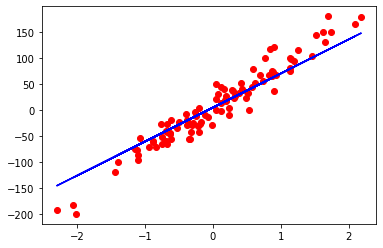

In [94]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# 0) prepare data 

X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features = 1, noise = 20, random_state = 1)

X = torch.from_numpy(X_numpy.astype(np.float32) )
y = torch.from_numpy(y_numpy.astype(np.float32) )


y = y.view(y.shape[0], 1)
#print(y.shape)

n_samples, n_features = X.shape

# 1) model

class LinearRegression(nn.Module):
    
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        self.lin = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        return self.lin(x)
    
model = LinearRegression(n_features, n_features)

learning_rate = 0.01


# 2) loss and optimizer
criterion = nn.MSELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


n_iters = 100

print(f'Prediction before training: f(5) = {model(X_test).item():.3f}')

for epoch in range(n_iters):
    
    #prediction: forward pass
    y_pred = model(X)
    
    #loss
    loss = criterion(y, y_pred)
    
    #backward pass
    loss.backward()
    
    #update weight
    optimizer.step()
    
    optimizer.zero_grad()
    
    if epoch % 10 == 0:
        [w, b] = model.parameters()
        print(f'epoch {epoch+1} : W = {w.item():.3f}, loss={loss.item():.8f}')
    
    
print(f'Prediction after training: f(5) = {model(X_test).item():.3f}')


predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()